In [500]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import gtd2d.plotter.plotter as plot
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [501]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/esim_data/line_top/"

In [502]:
with open(path + dataset + 'results/result.pkl', 'rb') as f:
    out = pickle.load(f)

C:\Users\schiavaz\AppData\Local\Temp/ipykernel_18440/4159380862.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  out = pickle.load(f)


In [503]:
results = plot.Plotter(out, base_path=path + dataset)
print(results.times.shape)

(79,)


In [504]:
img = results.get_frame("mean", 20, 29)
img[img == 0] = np.nan

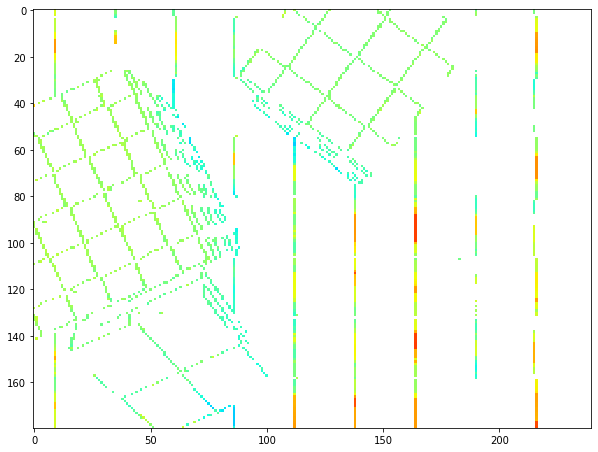

In [505]:
plt.figure(figsize=(10, 10))
m = plt.imshow(img, interpolation="none", cmap="jet_r", vmin=0, vmax=3)
# plt.colorbar(m)

IndexError: index 2000 is out of bounds for axis 0 with size 79

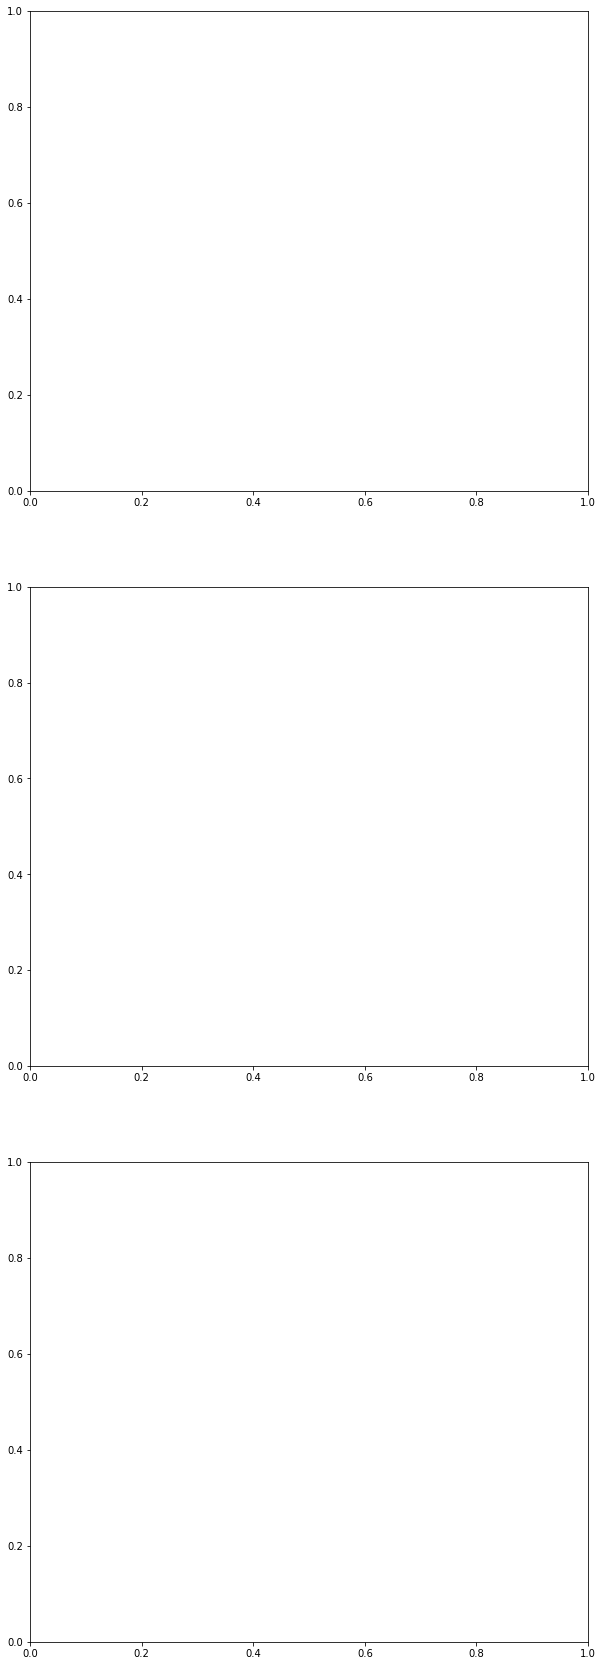

In [506]:
fig, axs = plt.subplots(3, figsize=(10, 30))
time = results.times[2000]
gt_frame = results.get_gt_frame(time)
axs[0].imshow(gt_frame, interpolation="none", cmap="jet_r", vmin=0, vmax=3, alpha=0.5)
m = axs[0].imshow(img, interpolation="none", cmap="jet_r", vmin=0, vmax=3)
diff = img - gt_frame
b = axs[1].imshow(np.abs(diff), interpolation="none")
#plt.colorbar(b, ax=axs[1])
axs[2].hist(np.abs(diff.flatten()), 100);
fig.tight_layout()

In [507]:
# results.plot_open3d("raw", z=2, v_range=(0, 3), id_range=(200, -1))
# results.plot_open3d_gt_only(z=2, v_range=(0, 3))

In [508]:
raw_errors, raw_rel = results.measure_errors("raw", sum_range=10)
mean_errors, mean_rel = results.measure_errors("mean", sum_range=10)

In [509]:
print("raw: \n\tmean: {}\n\tmedian: {}\n\tmean relative:{}\n\tmedian relative: {}".format(np.nanmean(raw_errors), 
                                                                   np.nanmedian(raw_errors), 
                                                                   np.nanmean(raw_rel),
                                                                    np.nanmedian(raw_rel)))
print("mean: \n\tmean: {}\n\tmedian: {} \n\tmean relative:{}\n\tmedian relative: {}".format(np.nanmean(mean_errors), np.nanmedian(mean_errors), np.nanmean(mean_rel),
                                                                    np.nanmedian(mean_rel)))

raw: 
	mean: 0.16001260938416575
	median: 0.08296701022195396
	mean relative:9.336675945349349
	median relative: 5.124222841996644
mean: 
	mean: 0.20442420643927792
	median: 0.07398965876538832 
	mean relative:11.123539982580617
	median relative: 4.45895095720816


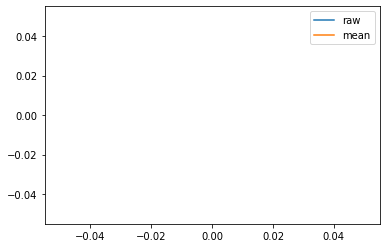

In [510]:
raw_plot = np.nanmedian(raw_errors, axis=(1, 2))[10:]
mean_plot = np.nanmedian(mean_errors, axis=(1, 2))[10:]

plt.plot(np.arange(raw_plot.size), raw_plot, label="raw")
plt.plot(np.arange(raw_plot.size), mean_plot, label="mean")
plt.legend()

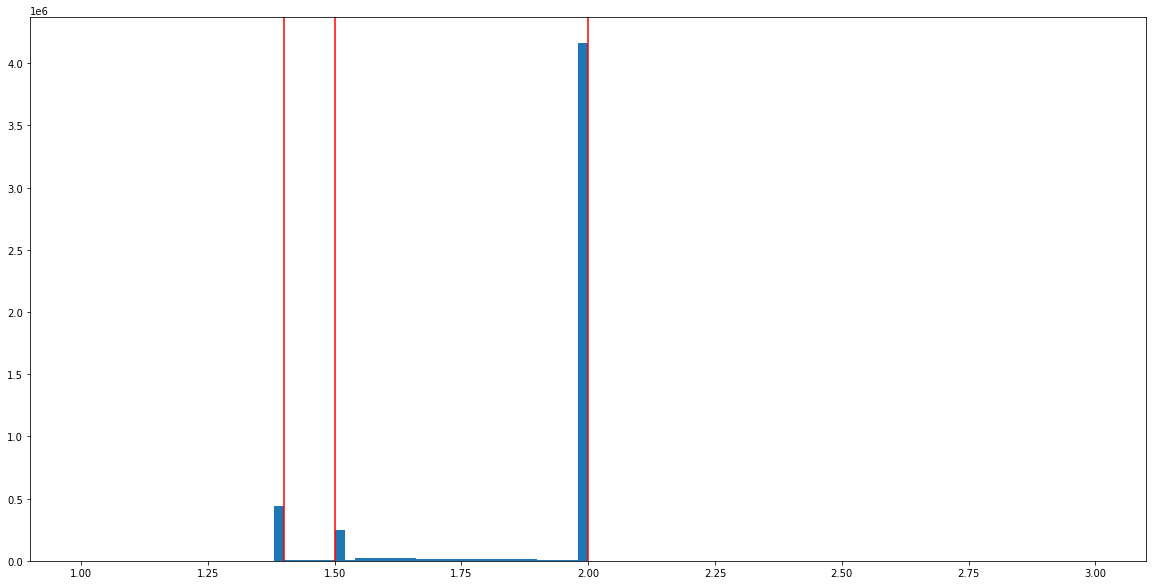

In [511]:
plt.figure(figsize=(20, 10))
plt.hist(results.gt_depths.flatten(), 100, range=(1, 3));
plt.axvline(1.4, c="red")
plt.axvline(1.5, c="red")
plt.axvline(2.0, c="red")

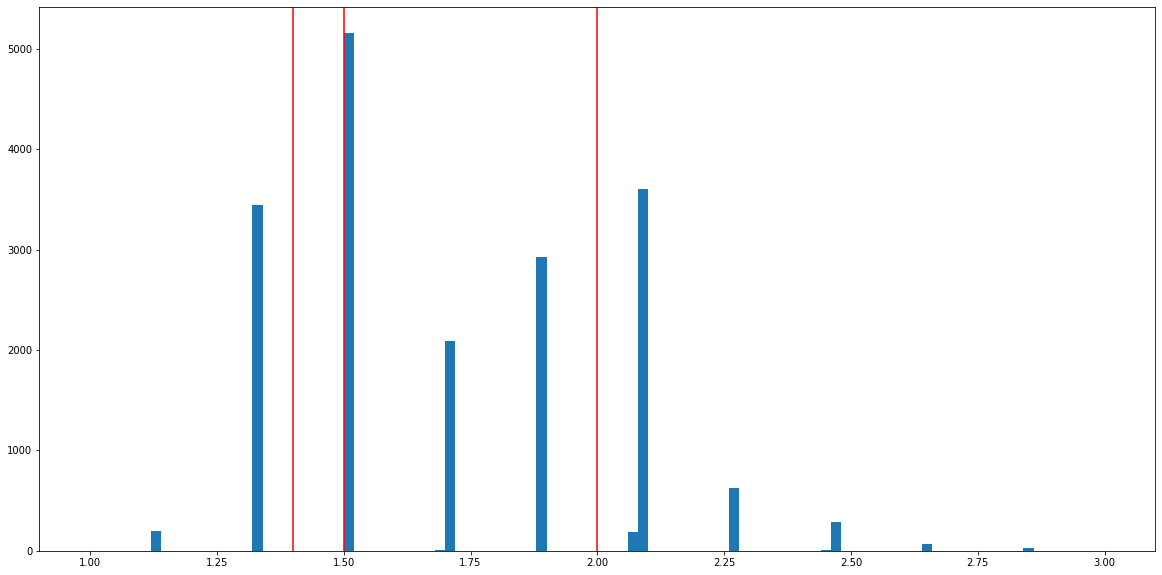

In [512]:
plt.figure(figsize=(20, 10))
plt.hist(results.get_all_values("raw", range=None), 100, range=(1, 3));
plt.axvline(1.4, c="red")
plt.axvline(1.5, c="red")
plt.axvline(2.0, c="red")

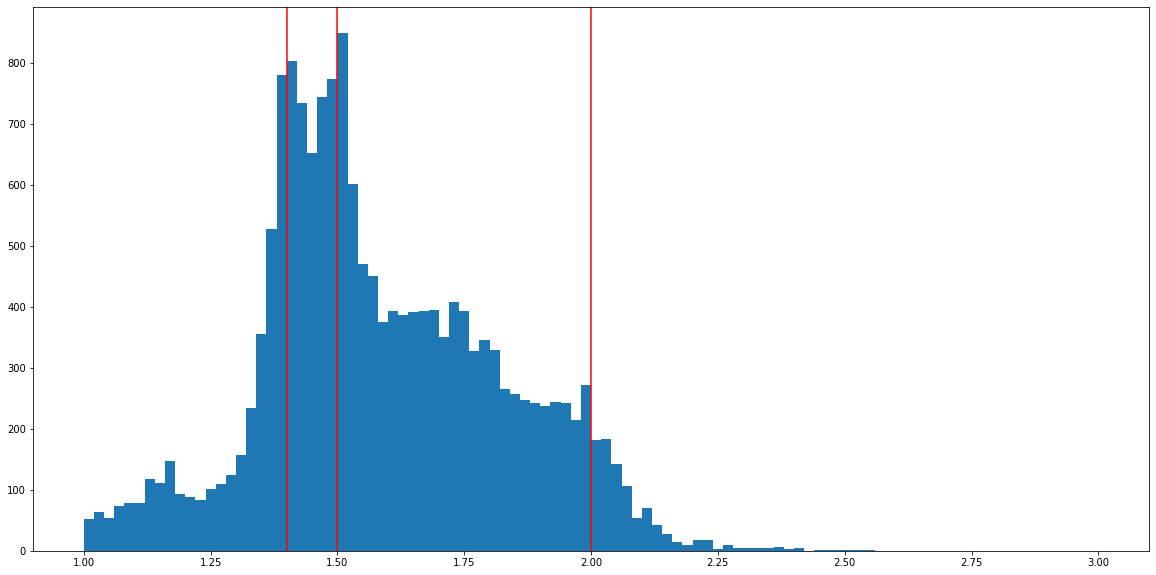

In [513]:
plt.figure(figsize=(20, 10))
plt.hist(results.get_all_values("mean"), 100, range=(1, 3));
plt.axvline(1.4, c="red")
plt.axvline(1.5, c="red")
plt.axvline(2.0, c="red")

In [514]:
flow_lava_u = [s.toarray() for s in results.flow_u]
flow_lava_v = [s.toarray() for s in results.flow_v]
flow_m_lava = np.sqrt(np.square(flow_lava_u) + np.square(flow_lava_v))
flow_m_lava = flow_m_lava[flow_m_lava != 0.0]

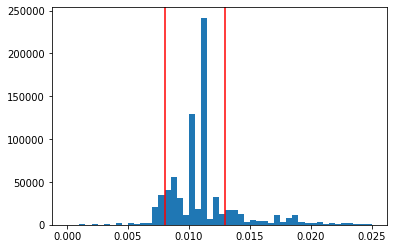

In [332]:
plt.hist(flow_m_lava.flatten(), 50, range=(0, 0.025));
plt.axvline(0.013, c="red")
plt.axvline(0.008, c="red")

In [333]:
flow_u, flow_v = results.get_frame_flow(15, 16)

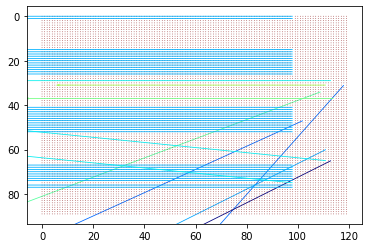

In [334]:
%matplotlib inline
m = np.sqrt(flow_u**2 + flow_v**2)
# plt.figure(figsize=(10, 10))
plt.quiver(flow_u[::2, ::2], flow_v[::2, ::2], m[::2, ::2], cmap="jet_r")
plt.gca().invert_yaxis()

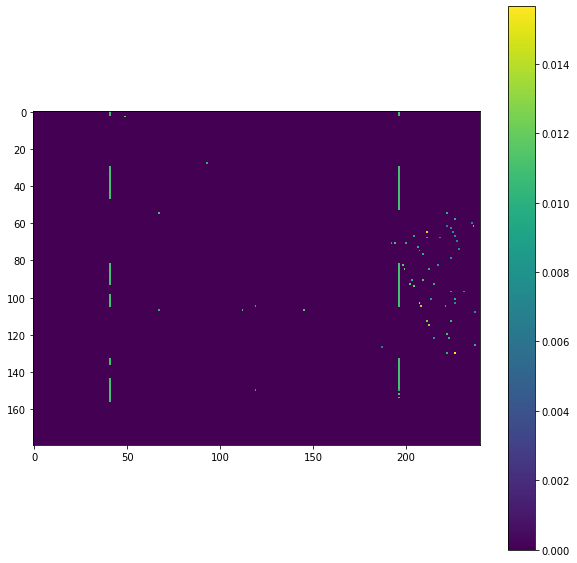

In [335]:
plt.figure(figsize=(10, 10))
b = plt.imshow(m, interpolation="none")
plt.colorbar(b)

In [515]:
import scipy.sparse

In [516]:
samples = np.array([s.toarray() for s in results.samples])

In [517]:
sample = samples[:, 80, 60]
sample[np.isclose(sample,0.0)] = np.nan

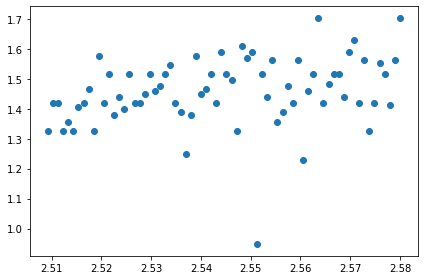

In [518]:
plt.scatter(results.times, sample)
plt.tight_layout()

In [519]:
mean_debug = np.array([s.toarray() for s in results.mean_debug])

In [520]:
mean_debug_sample = mean_debug[:,80, 60]

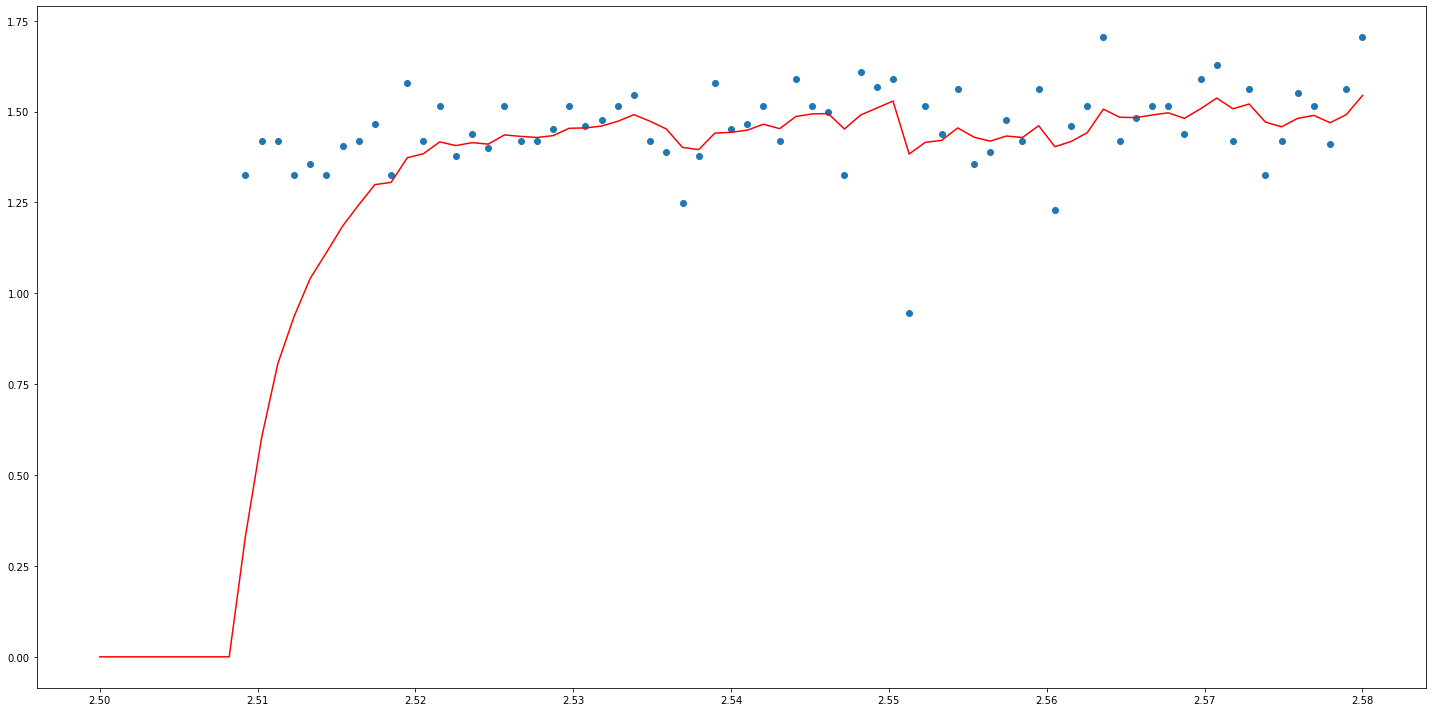

In [521]:
plt.figure(figsize=(20, 10))
plt.plot(results.times, mean_debug_sample, c="red")
plt.scatter(results.times, sample)
plt.tight_layout()

In [499]:
id_start = 100
x = 200
y = 90
timestep = 0.005
times = out["times"]

debug = out["samples"]

avg_log = out["mean_debug"]
avg_trace = []
for s in avg_log[id_start:]:
    avg_trace.append(s[y, x])

depth_log = np.copy(out["raw_depths"])
output_trace = []
for s in depth_log[id_start:]:
    output_trace.append(s[y, x])
output_trace[output_trace == 0.0] = np.nan

trace = []
for s in debug[id_start:]:
    if s[y, x] != 0.0:
        trace.append(s[y, x])
    else:
        trace.append(np.nan)

times = times[id_start:]

plt.figure(figsize=(20, 10))
plt.scatter(times, trace, s=10)
plt.plot(times, avg_trace, c="red")
# plt.scatter(times, output_trace, c="yellow")

IndexError: list assignment index out of range

In [462]:
vals = trace
ema = np.nan
avg = np.nan
emav = np.nan
med = np.nan
n = 0
a = 1 / 2**3
print(a)
at = 0.25
av = 0
ema_l = []
ema_vl = []
avg_l = []
val_l = []
time_l = []
med_l = []
v = vals[0]
last_t = 0
prev_v = np.nan
for i, v in enumerate(vals):
    if np.isnan(v):
        if np.isnan(prev_v):
            continue
    else:
        t = times[i]  
        av = 1 - np.exp((-t + last_t)/0.2)
        #print("av: {}, last_t: {}, t: {}, a:{}".format(av, last_t, t, a))
        #last_t = av*t + (1-av)*last_t
        last_t = t
        #print("idx: {}, v: {}, t: {}".format(idx, v, t))
        if np.isnan(ema): 
            ema = v
            avg = v
            emav = v
            n += 1
            med = v
        else:
            avg = (avg * n + v) / (n + 1)
            ema += a * (v - ema)
            emav = av*v + (1-av)*emav
            n += 1
            med = np.nanmedian(vals[i-10:i+1])
    #prev_v = v
    time_l.append(t)
    ema_l.append(ema)
    avg_l.append(avg)
    val_l.append(v)
    ema_vl.append(emav)
    med_l.append(med)

0.125


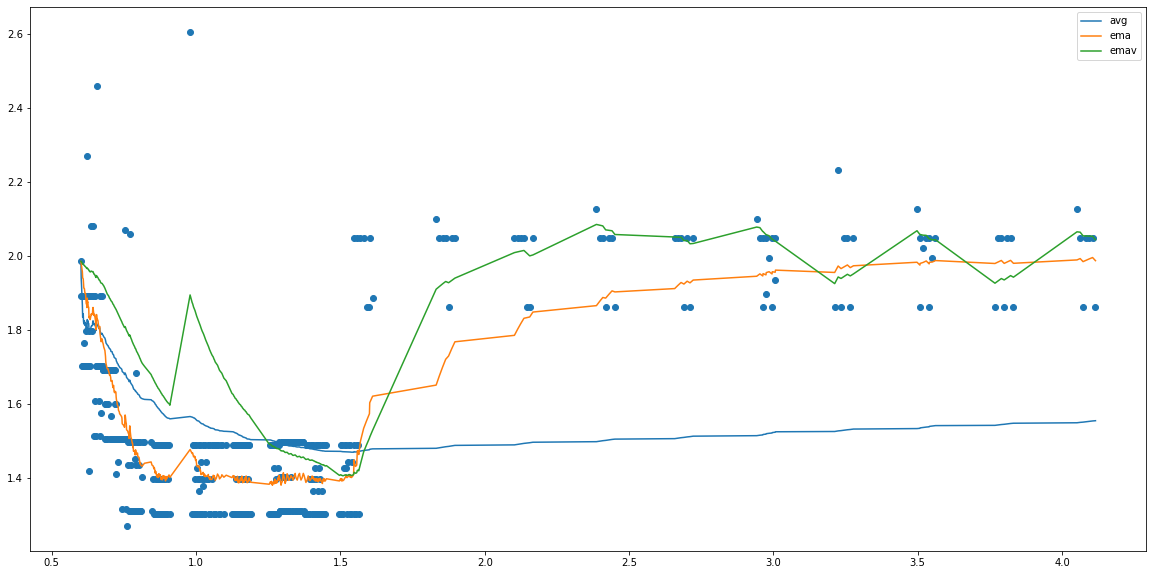

In [461]:
plt.figure(figsize=(20, 10))
# plt.plot(time_l, val_l, label="vals")
plt.plot(time_l, avg_l, label="avg")
plt.plot(time_l, ema_l, label="ema")
plt.plot(time_l, ema_vl, label="emav")
# plt.plot(time_l, med_l, label="med")
plt.scatter(times, vals)
plt.legend()

In [426]:
results.output["cfg"]

{'use_lava': True,
 'lava_floating': False,
 'base_path': '/home/schiavaz/lava-nc/depth/data/esim_data/line_top',
 'events_path': '/home/schiavaz/lava-nc/depth/data/esim_data/line_top/events.txt',
 'poses_path': '/home/schiavaz/lava-nc/depth/data/esim_data/line_top/groundtruth.txt',
 'calib_path': '/home/schiavaz/lava-nc/depth/data/esim_data/line_top/calib.txt',
 'output_path': '/home/schiavaz/lava-nc/depth/data/esim_data/line_top/results/result.pkl',
 'shift_axes': False,
 'dvs_shape': [180, 240],
 'time_range': [0.5, 4.7],
 'timesteps_second': 1000,
 'refractory_period': 0.1,
 'subsampling_factor': 1,
 'conv_stride': [1, 1],
 'conv_shape': [1, 1],
 'thresh_conv': 0.5,
 'avg_thresh': 200,
 'avg_shape': [7, 7],
 'avg_min_meas': 5,
 'avg_alpha': 0.0625,
 'chunk_size': 5000,
 'debug_output': True}

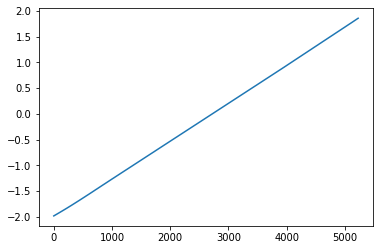

In [266]:
plt.plot(results.cam_poses[:,1])

In [267]:
idx = np.searchsorted(results.cam_poses[:,0], 2.5)

In [268]:
idx

3140

In [269]:
results.cam_poses[idx]

array([ 2.501     ,  0.30756169, -0.351     ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

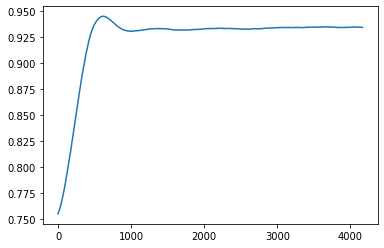

In [270]:
plt.plot(results.imu_vel[:,1])

In [271]:
results.imu_vel[idx]

array([ 3.14100000e+00,  9.34288849e-01, -2.27053599e-03,  3.08118303e+01])